# 들어가며
안녕하세요! 오늘은 다양하고 재미있는 값들을 예측하는 몇 가지 실습을 해 볼 예정입니다.

지금까지 멋지고 화려한 딥러닝 튜토리얼을 많이 해보셨다면, 오늘 다룰 데이터와 내용은 그에 비해 조금은 간단하게 느껴지실 수도 있을 것 같습니다.
하지만 본격적으로 시작하기 전에 이 노드의 목표는 **"머신러닝의 본질을 관통하는 철학과, 그 과정"**을 깊게 파고들며 이해해 보는 것임을 말씀드리고 싶습니다.
그렇기 때문에 비교적 간단한 데이터로 실습을 진행하며, 그 이면에 숨어있는 과정과 보다 엄밀한 개념들을 전부 뜯어볼 것입니다.

오늘은 아마 다른 어떤 날보다 수식을 많이 다루게 될 테니, 옆에 종이와 펜을 함께 준비하시고 시작하셔도 좋을 것 같군요! 😊

우선 오늘 실습에 필요한 모듈을 불러와 주세요.

In [ ]:
from IPython.display import display, Image
print("슝=3")

그럼, 시작해 보겠습니다.

**[아이스브레이킹] '나는 자전거를 못 탄다'를 영어로 뭐라고 할까요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

모타싸이클
<details>

## 학습 전제
---
- numpy, pandas, matplotlib 등의 라이브러리를 자유롭게 활용할 수 있습니다.
- 원핫인코딩 등의 간단한 데이터 전처리 방식의 개념에 대해 알고있습니다.
- 고등 수학 과정 중 도함수의 정의와 미분계수 수식, 그리고 간단한 미분 공식을 알고 있습니다.
- 머신러닝의 개념과 그 패러다임에 관해 학습해본 적이 있으며, 낯설지 않습니다.

## 학습 목표
---
- 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction 각각의 개념을 알고, y에 가까운 prediction을 낼 수 있도록 학습한다는 철학을 이해합니다.
- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익힙니다.
- 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행해봅니다.
- 손실함수를 정의하고 경사하강법을 활용해 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익힙니다.
- sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힙니다.

## 학습 내용
---
Step 1. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기

- (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기
- (2) "모델"을 세운다는 것, 그에 대한 의미 이해하기
- (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기
- (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!
- (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

Step 2. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기

- (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
- (2) 다시 한번 직접 설계해 보는 손실함수
- (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기
- (4) 모두 준비 되었다면, 모델 학습은 간단하죠!
- (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

# 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기
> 데이터셋 가져와서 두 변수 간의 상관관계 확인하기

지금부터 중고 맥북의 가격을 맞춰보는 실습을 해 보려고 합니다!

여러분은 각자 개인 노트북이 있으신가요?
저는 몇 년 된 맥북을 사용하고 있습니다. 이제 곧 이 오래된 맥북을 팔고 새로운 친구를 맞아볼까 고민이 되기도 하는데요.

여기에 몇 년 동안 사용되었는지에 대한 사용연수와 각 맥북의 중고가격을 담은 간단한 데이터셋이 있습니다.
(물론 실제 데이터는 아니고, 우리가 실습을 해 보기 위한 간이 데이터입니다!)

사용 연수와 중고가격에는 서로 어떤 관계가 있을까요? 한번 확인해 보시죠.

## 데이터 준비
---
데이터는 2차원 표 데이터로 이루어져 있습니다. 표 데이터를 다룰 때 가장 많이 쓰는 바로 그 라이브러리! 뭐였죠?

네, 이제는 익숙하실 판다스! 를 먼저 가져와보겠습니다.

In [ ]:
import pandas as pd
print("슝=3")

[macbook_data.zip](https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip)

다음과 같이 필요한 데이터를 다운로드 받아 주세요. unzip 명령어를 통해 압축을 풀고, data 폴더를 ~/aiffel/bike_regression 폴더로 이동시켜 줍니다.


```bash
$ mkdir -p content/bike_regression
$ cd content/bike_regression
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/macbook_data.zip
$ unzip macbook_data.zip
```

표 데이터는 `csv` 형식의 파일입니다. 판다스의 `read_csv` 함수에 파일의 위치를 알맞게 넣어주면 손쉽게 가져올 수 있죠.

파일 이름은 `macbook.csv` 입니다.

## 데이터 확인하기
---

In [ ]:
macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()

데이터를 불러오면서 표의 크기(`shape`)와 표의 가장 윗부분을 간단히 확인해 보았습니다.

데이터는 사용 연수를 나타내는 `used_years`와 중고 가격을 나타내는 `price`, 두 열로 이루어져 있군요.
총 80행으로, 노트북의 개수가 80개라고 보면 되겠습니다.

첫 번째 행은 약 2.65년 간 사용된 중고 제품이고, 중고가는 175만 원인가 봅니다.
세 번째 행에는 0.95년, 약 1년도 채 사용하지 않은 거의 새 제품에 대한 정보가 있군요. 역시 새 제품이라 그런지 273만 원이라는 비싼 가격을 보이고 있습니다.

노트북이나 컴퓨터를 사용해 보셨다면 알겠지만, 당연히 노트북의 중고가를 결정짓는 것은 사용연수만이 아닙니다.
노트북의 CPU 사양이라던가, 화면의 크기, RAM의 크기 등 아주 다양한 특징들도 중고가에 영향을 미칠 수 있겠죠.

일단은 사용 연수만 담겨있는 데이터셋이니, 정확하진 않겠지만 이 정보만으로 최대한 중고가격을 맞춰보는 것으로 하죠!

## 데이터 시각화
---
데이터를 가져왔으니, 그래프로 시각화해서 데이터를 조금 더 직관적으로 확인해 보겠습니다.
그래프를 그리려면, 어떤 라이브러리를 사용할까요?

`matplotlib`이라는 라이브러리를 사용합니다. 관습적으로 사용하는 `plt` 라는 이름으로 가져와 보죠!

In [ ]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

그럼 이제 `matplotlib`으로 2차원 그래프를 그려보겠습니다.

`x` 축에는 사용 연수에 해당하는 `used_years`를, `y` 축에는 중고가에 해당하는 `price`를 입력해 보죠.

In [ ]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

오호, 흥미롭네요. 그래프를 그려보았더니 x축과 y축간의 관계가 확실히 보이는 것 같습니다.

**Q. x축의 사용 연수와 y축의 중고가는 서로 어떤 관계를 갖는 것으로 보이나요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

사용 연수가 높아질수록 중고가는 낮아진다.
<details>

네, 상식적으로도 노트북의 사용연수가 높아지면 중고가는 점점 낮아지겠죠. 두 변수 간에는 분명히 어떤 관계가 존재합니다.

## 상관관계
---
이렇게 한 변수가 커짐에 따라 다른 변수가 작아지는 관계인 경우, 두 변수는 '상관 관계가 있다'고 하고, 그 관계된 정도는 '피어슨(Pearson) 상관 계수'로 표현할 수 있습니다.

상관계수의 크기에 대해 가장 잘 나타낸 이미지는 다음 이미지입니다.

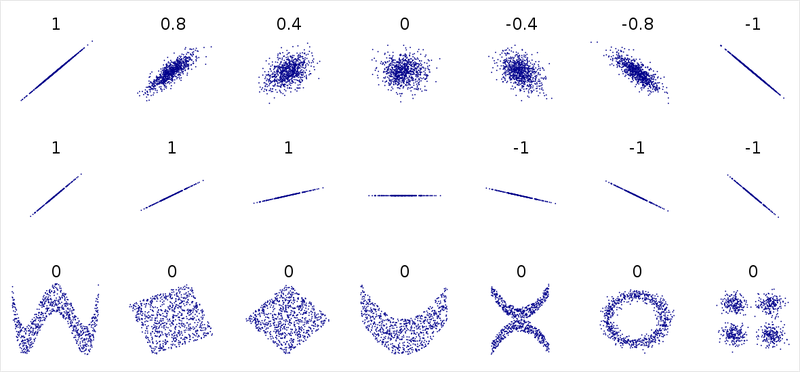

[위키백과]

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

위 이미지는 두 변수에 대해 데이터가 어떻게 분포해 있는지 나타낸 그림입니다.
각 이미지 위에 써있는 숫자가 바로 상관계수 값인데, 상관계수 값은 -1에서 1 사이의 값을 가집니다.

상관 관계가 없다면 상관계수 값은 0이고, 상관관계가 강하다면 상관계수의 절대값이 점점 커지죠.
상관계수가 양의 값이라면 한 변수가 커질수록 다른 변수의 값도 커지게 되고, 상관계수가 음의 값이라면 한 변수가 커질수록 다른 변수는 작아집니다.
즉, 데이터 분포의 기울기가 양이라면 상관계수도 양의 값이고, 기울기가 음이라면 상관계수도 음의 값입니다.
상관계수가 양이라면 두 변수는 '양의 상관관계', 음이라면 '음의 상관관계'를 가진다고 할 수 있습니다.

위 이미지의 첫 번째 줄에서 볼 수 있듯, 데이터의 분포가 직선에 가까울수록 상관계수 값은 -1 또는 1에 가까워집니다.
즉, 두 변수 간에 한 변수가 커짐에 따라 다른 변수가 커지거나 작아지는 상호 관계성이 강할수록 상관계수의 절대값이 커지죠.
반면, 데이터의 분포가 넓게 퍼지며 원에 가까워질수록 상관계수의 값은 0에 가까워집니다.
아예 원 모양으로 동그랗게 퍼진다면 두 변수간에 어떠한 상관 관계도 없다고 볼 수 있는 거죠.

단, 여기에서 주의해야 할 것은 이미지의 두 번째 줄입니다. 두 번째 줄에는 데이터의 분포는 직선이지만 각각의 기울기가 다릅니다.
하지만 상관계수는 '기울기'를 이야기하는 것이 아니라 두 변수 간에 한 변수가 변함에 따라 다른 변수의 값이 어떻게 변하는지에 대한 '상호적인 관계의 정도'를 나타내는 것이기 때문에, 기울기가 급하든 완만하든 데이터의 분포가 직선에 가깝다면 상관계수는 항상 1 또는 -1에 가까워진다고 할 수 있습니다.

이 차이는 헷갈릴 수 있는 개념이기 때문에, 확실하게 이해하고 넘어가는 것이 좋습니다.

이미지의 마지막 줄에는 데이터 분포가 분명히 어떤 '패턴'을 가지고 있지만, 양 또는 음의 상관관계를 가지는 것은 아니기 때문에 상관계수는 0입니다.
이 또한 상관관계와 상관계수는 **두 변수 간의 패턴을 나타내는 것이 아닌, 각 값의 증가 또는 감소에 대한 관계만을 나타내기 때문**이라고 할 수 있습니다.

상관관계를 이야기 할 때 항상 언급되는 친구같은 개념은 **인과관계**입니다.
상관관계와 인과관계의 차이는 오늘 내용에서는 벗어나기 때문에 깊게는 다루지 않겠습니다만, 궁금하시다면 다음 글 중 '**오류의 예**' 파트를 읽어보세요!

- [상관관계와 인과관계](https://modulabs.co.kr/blog/corrleation-and-causality/)

그렇다면 이제 이론은 뒤로 두고, 다시 우리 데이터의 그래프를 한번 봅시다.

In [ ]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

**Q. 위에서 두 변수는 상관관계가 있나요? 있다면 어떤 상관관계가 있나요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

위의 그래프에서 x축인 사용연수가 높아질수록 y축인 중고가격은 낮아진다. 따라서 '음의 상관관계'가 있다고 할 수 있다.
<details>

## 상관계수 구해보기
---
상관관계가 있다면, 상관계수 값은 얼마정도인지 확인해 보지 않을 수 없겠죠.

통계학 또는 데이터사이언스에서 가장 많이 쓰이는 라이브러리인 numpy 에서는 상관계수를 보여주는 `corrcoef()` 라는 함수를 제공합니다.

상관관계를 확인하고 싶은 두 변수가 있다면 `np.corrcoef(x, y)` 형태로 넣어주면 됩니다.

In [ ]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

네, 행렬로 나왔네요. 변수가 두 개이기 때문에 2x2의 행렬로 나타났습니다.
대각선에 해당하는 `(0, 0)` 위치와 `(1, 1)` 위치는 각각 첫 번째 변수와 첫 번째 변수, 두 번째 변수와 두 번째 변수끼리의 상관계수를 나타내기 때문에 항상 1이 됩니다.
왜냐구요? 자기 자신과의 상관계수를 나타내기 때문이죠!

`(0, 1)`과 `(1, 0)` 위치에는 첫 번째 변수와 두 번째 변수 간의 상관계수가 나타났네요.
약 -0.79로 강한 음의 상관계수가 보입니다. 이는 분명 두 변수 간에 강한 상관관계가 있음을 나타내는 거죠!

# 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 (2) "모델"을 만든다는 것, 그 의미 이해하기
> 회귀 분석의 시작, 일차함수 모델을 그려보고 그 의미 알아보기

그렇다면 우리는 사용연수인 `used_years` 값을 입력받으면 중고가격이 얼마정도에 해당할지, 그 값을 잘 예측하는 모델을 만들어볼 수 있을까요?
직접 한번 진행해 보시죠!

## 모델(model)이란?
---
'**모델(model)**' 이라는 용어를 사용하였는데, 모델은 '특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'로 이해할 수 있습니다.
여기에서 또다시 '**함수**' 라는 용어가 나왔습니다. 중고등학교 수학에서는 함수를 '입력값을 받아 특정 연산을 행한 값을 출력하는 것' 정도로 배웠었죠.
지금은 이 정도로 간단한 설명으로 넘어가 보도록 하겠습니다.

오늘은 아주 간단한 모델부터 점점 복잡한 모델까지 다뤄볼 예정입니다. 물론 앞으로는 훨씬 복잡한 모델도 다양하게 다뤄볼 것입니다!

모델은 간단히 말해 어떤 '함수'라고 이야기 했으니, 중고등학교에서 배웠던 것을 떠올려 자연스럽게 x와 y를 준비해 볼 수 있겠습니다.

지금 우리에게 x와 y는 각각 어떤 것들이 될까요?

## 풀고자 하는 문제가 무엇인가?
---
우리가 하고자 하는 목적을 다시 정리해 봅시다. 우리는

- 사용 연수를 입력받아서,
- 중고가를 예측

하는 문제를 풀려고 합니다.
따라서 우리의 입력은 `사용 연수`가 될 것이고, 모델이 사용 연수를 입력받으면 그 정보에 따라 적당한 `중고가`를 예측해서 출력하면 되겠군요.

입력에 해당하는 `x`에는 `used_years`의 정보를, 출력에 해당하는 `y`에는 `price` 정보를 담아보겠습니다.

In [ ]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

그럼 이제 모델을 만들어 볼 차례군요.

## 일차함수 모델
---
우리는 첫 번째로 가장 간단하게 일차 함수 모델을 만들어 보겠습니다.
뒤에서 이 일차 함수가 어떤 의미를 갖는 모델인지 더 자세하게 알아볼 테지만, 지금은 그저 모델이 '기울기'가 있고 'y절편'이 있는 일차 함수 형태라는 것만 이해하면 무리가 없습니다.

다만, 중고등학생 때 했던 것과는 다르게 기울기를 `w`, y절편을 `b`라고 두겠습니다.
이 알파벳들은 머신러닝 분야에서 굉장히 많이 쓰이는 표기법이니 기억해두면 좋습니다!

파이썬에서 일차함수를 만드는 것은 다음과 같이 함수로 구현하면 간단하죠!
다음 함수는 x와 함께 기울기, y절편을 같이 입력받은 후 x에 기울기를 곱하고 y절편 값을 더해서 y를 연산해낸 후 그 값을 출력합니다.

In [ ]:
def model(x, w, b):
    y = w * x + b
    return y
print("슝=3")

실제로 작동시켜볼까요?
$y = 2x + 1$의 함수에 $x=5$를 넣어봅시다. 예상 출력값은 $5 \times 2 + 1 = 11$이네요!

In [ ]:
model(x=5, w=2, b=1)

네, 예상값이 제대로 나왔군요! 문제없이 우리의 모델로 사용할 수 있겠습니다.

## 모델 학습이란?
---
자, 그러면 이제 모델을 "**학습**", 혹은 "**훈련(training)**" 이라고 말하는 단계로 넘어갑니다.
잠깐, 우리는 일차함수를 사용하는 것 뿐인데, 학습을 시킨다는 것은 무엇이고 또 어떻게 학습을 시킬 수 있는 걸까요?

먼저, 모델을 학습시킨다는 것은 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "**매개변수**", 혹은 "**파라미터**" 를 찾는다는 뜻과 같습니다.

이게 무슨 말이냐구요?! 정말 쉽게 이야기하자면, "**방정식을 푼다**" 는 것과도 일맥상통하는 말입니다!

자, 이렇게 생각해 봅시다. 우리에게 다음과 같은 두 가지 데이터가 있다고 하겠습니다.

- 사용연수가 2년인 맥북의 중고가: 100만 원
- 사용연수가 5년인 맥북의 중고가: 40만 원

만약 이 두 가지의 데이터가 있고, 세상의 모든 맥북의 중고가가 위와 정확히 일치하는 일차함수에 따라 결정된다고 하면 이 방정식을 어떻게 풀 수 있을까요?
다음과 같은 과정으로 간단히 연립방정식을 통해 풀 수 있겠죠.

1. 구하고자 하는 방정식을 $y=wx+b$ 라고 하자.
2. 첫 번째 데이터에 따라, $100 = w \times 2 + b$ 라는 식을 세울 수 있다.
3. 두 번째 데이터에 따라, $40 = w \times 5 + b$ 라는 식을 세울 수 있다.
4. 두 식을 통해 하단의 식과 같은 연립방정식을 세울 수 있다.
5. 간단한 연립방정식 풀이를 통해 $w=-20$, $b=140$, 즉 $y = -20x + 140$ 이라는 방정식을 구할 수 있다.

$$\left\{\begin{array}{l}100=w \times 2+b \\ 40=w \times 5+b\end{array}\right.$$

네, 위와 같이 `w`와 `b`를 구하는 것은 아주 간단합니다!
이렇게 방정식을 풀어 올바른 일차함수를 구한 후에는 새로운 데이터가 들어오더라도 그 중고가가 얼마인지 바로 구할 수 있게 됩니다.

**Q. 맥북의 중고가에 대해 위 방정식을 만족하는 세계에서 6년 된 맥북은 얼마에 팔 수 있을까요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

위 방정식에 $x=6$을 대입해 보면 $y = -20 \times 6 + 140 = 20$, 즉 20만 원이라는 값을 구할 수 있다.
<details>

위에서 구한 함수와 우리에게 있는 `(2, 100)`, `(5, 40)`, `(6, 20)` 세 가지 점을 그래프로 그려보면 다음과 같습니다.

In [ ]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

정확하게 세 점을 지나는 일차함수를 잘 구했네요. 우리는 완벽한 모델을 찾은 것입니다! 👏🏼👏🏼👏🏼

.

.

.

## 오차를 최소화하는 모델
---
하지만 사실 우리는 현실에서 이렇게 문제를 풀 수 없습니다 😭
왜냐구요?! 다시 한 번, 우리의 진짜 데이터를 살펴봅시다.

In [ ]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

어떤가요?

우리의 데이터는 이쁘게 일직선 위에 존재하지 않습니다. 저 모든 점을 지나는 일직선이란 안타깝게도 이 세상에 존재하지 않죠.
즉, 우리가 중고등학생 때 풀었던 연립일차방정식같은 문제는 현실세계에는 맞지 않습니다.

사실 위의 데이터도 현실세계에서는 아주 간단한 데이터일뿐, 현실 데이터는 이보다도 훨씬 복잡하기 때문에 나의 데이터에 정확히 맞는 '함수'를 찾는 것은 거의 불가능합니다.

하지만 그럼에도 불구하고 우리는 어느 정도의 오차가 있더라도 적절한 값을 예측할 수 있는 모델을 찾기를 바랍니다.
완벽하지 않더라도 최대한 잘 맞는, 그런 함수 또는 모델을 찾고 싶은 거죠!

그러면 위와 같은 데이터를 최대한 잘 맞출 수 있는 일차함수를 찾는다면 어떤 함수를 생각해 볼 수 있을까요?

다음과 같은 직선을 찾을 수 있다면 좋을 것 같군요.

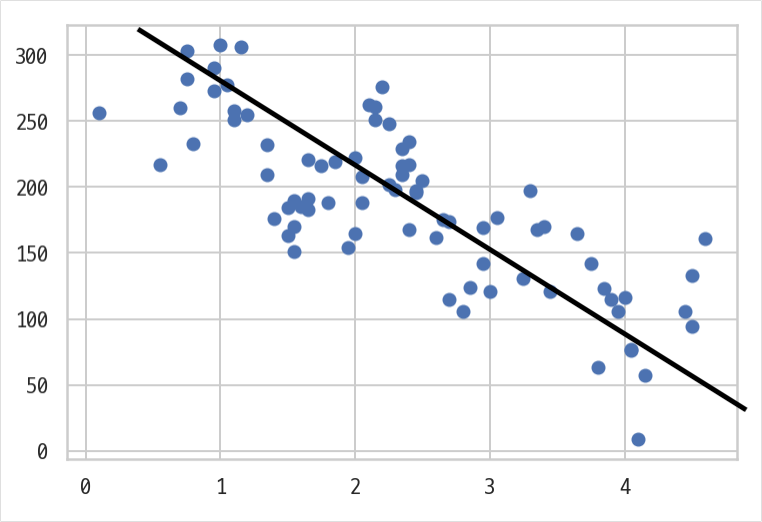

위 그림에서 직선은 제가 적당히 모든 데이터의 중앙 정도에 위치하도록 그려본 직선입니다.
함수의 방정식을 정확히 알고 그린 것이 아닌, 2차원 좌표에 찍힌 데이터들을 보고 대략적으로 그린 것이기 때문에 아직 저 함수의 기울기와 y절편이 무엇인지는 모르죠.

그것을 찾아내는 것이 바로 우리의 목표입니다!
모든 데이터를 정확히 맞출 수는 없지만, 최소한의 오차를 낼 수 있는 그런 함수를 찾는 것 말입니다.

정확히는 $y=wx+b$라는 함수에서 위와 같이 최적의 직선이 될 수 있는 $w$와 $b$값을 찾는다는 의미가 되겠습니다.

여기에서 우리가 찾아야하는 `w`와 `b`같은 값을 보통 "**매개변수**" 또는 "**파라미터**", 또는 "**가중치**" 라고 합니다.

위 세 가지 용어는 모델이 데이터를 학습해 나감에 따라 업데이트되는 값들을 칭하는 용어입니다. 이 단어들은 아주 보편적으로 많이 쓰이니 정확한 의미를 기억해두시길 바라요!

그렇다면 우리는 위 데이터만을 가지고 최적의 파라미터인 $w$와 $b$를 어떻게 구할까요?

다음 단계부터 방법을 알아보겠습니다.

# 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기
> 정확한 방정식을 구할 수 없는 현실 세계의 데이터에 대해 예측할 수 있는 모델을 찾기 위한 손실함수의 개념 알아보기

"최적의" 함수는 어떻게 찾을 수 있을까?
자, 그러면 우리는 이제 "정답" 함수는 아니더라도, 최소한의 오차를 낼 수 있는 "최적의" 함수를 찾아야 한다는 것을 알았습니다.

그렇다면 이러한 "최적의" 함수는 어떻게 찾을 수 있을까요? 🤔

.

.

.

사실 위의 질문은 아주 본질을 꿰뚫는 질문이라고 할 수 있습니다.
머신러닝이라는 큰 분야의 궁극적인 목표기도 하죠!
우리는 어쨌든 데이터로부터 모델을 "학습"시키고, 그 모델이 새로운 데이터를 입력받았을 때 최대한 올바른 값을 "예측"하기를 바라니까요.
우리의 목표는 언제나 "최적의 함수"를 찾는 것입니다.

참, 이쯤 되면 눈치채셨겠지만, 이제 우리는 "모델"이라는 단어와 "함수"라는 단어의 본질이 같다는 것을 이해할 수 있습니다.

그런 만큼 사실 위 질문에 대한 답은 아주 어려워질 수도 있습니다. 지금도 각 문제와 데이터셋에 맞는 "최적의 함수"를 찾기 위해 전세계의 머신러닝 연구자들이 고심하고 있답니다.

우리는 단계적으로 나아가는 과정에 있으니, 가장 간단한 방법으로 최적의 함수, 그 중에서도 최적의 "**일차함수**" 를 찾는 방법을 먼저 배워볼 것입니다.

우리는 위에서 살펴봤던 것처럼 마법처럼 연립방정식을 풀어서 정확한 $w$와 $b$ 값을 딱! 하고 구할 수 없습니다.  
따라서 우리는 한 번에 정답을 찾기보다, 처음에 아주 랜덤한 값으로부터 시작해서 점차적으로 최적의 $w$와 $b$ 값을 찾아나가는 방법을 택할 것입니다.

최적의 값을 찾아나가기 위해서 우리는 **손실함수** 라는 한 가지 새로운 지표를 설정합니다.
바로 "**아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이**" 를 확인하는 거죠.

완벽한 정답함수는 존재하지 않더라도, 모델의 출력값과 실제 정답 간의 차이를 계산할 수 있고, 그 값을 점차 줄여나갈 수 있다면 우리는 점차 최적의 함수에 가까워질 수 있겠죠.  
따라서 우리는 먼저 1) 모델이 출력하는 값과 실제 정답 간의 차이를 계산하고, 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습시켜 나갈 것입니다.

## 예시를 통해 이해하기
---
예를 들어, 현재 아직 불완전한 모델이 다음과 같다고 해 보겠습니다.

In [ ]:
w = 3.1
b = 2.3
print("슝=3")

위의 w와 b값은 아무렇게나 입력해놓은 랜덤한 초깃값입니다. 위와 같은 가중치를 가지는 함수는 다음과 같겠군요.

$$y=3.1x \times 2.3$$

이 그래프를 그려볼까요?

In [ ]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

음, 아무래도 전혀 맞지 않는 직선이군요. 우리는 더 좋은 $w$와 $b$를 찾을 필요가 있습니다.

그러면 현재의 모델이 얼마나 틀린 답을 만들어내고 있는지를 확인해 봅시다. 우리의 데이터 중 `used_years`를 `x`를 다시 가져와보겠습니다.

In [ ]:
x = macbook["used_years"].values
x

우리의 모든 데이터에 대한 `used_years` 값들이 담겼습니다. 이 데이터를 모델에 넣어서 모델이 출력하는 값을 `prediction`에 담아보죠.

In [ ]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

각각의 y값에는 x를 입력받은 후 현재의 $w$와 $b$에 대해 계산해 출력한 값들이 저장되었습니다.

그러면 이 값들을 `macbook` 데이터프레임에 넣어서 실제 값과 얼마나 다른지 확인해 볼 수 있겠습니다.

In [ ]:
macbook['prediction'] = prediction
macbook.head()

`prediction`이라는 새로운 컬럼에 y 값들을 넣어봤는데, 어떤가요?

당연히 아직은 실제 정답인 `price`와 매우 큰 차이가 납니다. 아직은 조금은 멍청한 모델이기 때문이죠..

## 정답과 예측값 간의 차이
---
우리는 모델에게 "너가 이만큼 틀리고 있어!" 라는 것을 알려줄 것입니다. 그 정보를 바탕으로 모델이 조금씩 개선을 해나갈 수 있는 방법이 있거든요!
그렇다면 모델이 얼마나 틀렸는지는 어떻게 평가할 수 있을까요?

당연히 "**정답과 예측값 간의 차이**" 를 생각해 볼 수 있겠습니다.
그렇다면 `price`와 `prediction`의 차이인 `error` 컬럼을 새로 만들어보겠습니다.

In [ ]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

에러가 아주 크군요.

이 값을 바로 사용해도 되지만, 우리는 특별히 **error를 제곱**해서 모델의 오차를 측정할 것입니다.
제곱을 사용하는 방법 외에도, 에러의 절댓값 등을 사용하는 방법도 있습니다.

에러의 종류는 다음 글에서 간단히 살펴보겠습니다.

- [Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check in R](https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html)

**Q. 글에서는 "모델이 얼마나 틀렸는지를 평가하는 지표"로 네 가지를 소개합니다. 각각은 무엇인가요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

MAE : Mean Absolute Error, 오차의 절댓값의 평균

MSE : Mean Squared Error, 오차의 제곱의 평균

RMSE : Root Mean Squared Error, MSE의 제곱근

R-squared : Coefficient of Determination, 결정 계수

위의 네 가지는 모두 많이 사용되지만, 그 중에서도 특히 많이 사용되는 것은 **RMSE** 입니다.  
RMSE는 말 그대로 MSE를 제곱근한 값인데, MSE는 제곱된 오차들의 평균이기 때문에 그 값의 단위를 원래 정답값과 맞춰주고자 제곱근을 씌운다는 개념이 담겨있습니다.

어떤 두 개의 값에 대한 RMSE 값을 구하는 함수는 다음과 같이 간단히 구현할 수 있습니다.

In [ ]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

그렇다면 우리의 모델이 출력한 `prediction` 값과 정답인 `y` 간에 얼마나 차이가 있는지, RMSE를 구해 보도록 하겠습니다.

다시 한 번 모델에 `x`, `w`, `b`를 입력해 `predictions`를 구해 봅시다.

In [ ]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

그 후 `RMSE()` 함수에 `predictions` 와 `y`를 넣으면 둘 간의 rmse값을 구할 수 있습니다.

In [ ]:
rmse = RMSE(predictions, y)
rmse

와우! 엄청나군요. 😂
아직 모델이 너무나 부정확하기 때문에 `rmse`값이 매우 크게 나타납니다.

## 손실함수(비용함수)
---
이렇듯 모델의 예측값과 정답값에 대한 차이를 계산하는 함수를 **손실함수(loss function)**, 또는 **비용함수(cost function)** 라고 부릅니다.  
현재 모델이 얼마나 손실을 내고 있는지 나타낸다는 개념으로 이해할 수 있습니다.

즉, 손실값(loss)이 크다는 것은 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 손실값이 작다는 것은 모델이 정답에 가까운, 올바른 예측을 하고 있다는 것으로 해석할 수 있습니다. 따라서 손실값은 작을수록 좋습니다.

그러면 우리의 손실함수를 RMSE를 활용해 다음과 같이 정의하도록 하겠습니다.

In [ ]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

손실함수는 "**모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수**" 라고도 할 수 있습니다.
현재 모델이 예측하는 값과 정답이 얼마나 멀리 떨어져있는지를 계산하는 함수이기 때문이죠!

손실함수와 비용함수 또한 머신 러닝 모델의 학습 과정에서 굉장히 중요한 개념이므로 꼭 그 정확한 개념을 기억하고 있는 것이 좋습니다!

그렇다면 이제 `rmse`값, 즉 우리 모델의 손실함수값을 줄여나가야겠죠.
다음 단계에서 그 방법에 대해 알아보겠습니다.

# 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!
> 손실함수값을 점차적으로 줄일 수 있는 경사하강법에 대한 개념과 구현 알아보기

## 기울기와 경사하강법(Gradient Descent)
---
자, 모델이 현재 얼마나 틀리고 있는지를 계산하는 손실함수에 대해서도 알아보았으니, 우리는 그 값을 줄이기만 하면 됩니다.

그런데 이 값을 어떻게 줄여나갈까요?

자, 위에서 우리가 정의했던 손실함수를 다시 한 번 살펴보겠습니다.

In [ ]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

한번 자세히 보고 고민해 보면서 다음 질문에 답해 봅시다.

**Q. 위의 손실함수의 입력값인 x, w, b, y 중 최종 출력값인 loss 가 줄어들도록 우리가 직접 수정할 수 있는 값은 무엇인가요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

x, w, b, y 중 x와 y는 주어진 데이터로 우리가 수정할 수 없는 값이다.  
다만, w와 b는 우리가 수정할 수 있다. 이렇게 수정할 수 있는 변수를 "파라미터", 혹은 "가중치"라고 한다.
<details>

네, 손실함수는 현재 네 가지 변수를 입력받고 있지만 이 중 출력값인 `loss`가 실제로 줄어들도록 우리가 수정해 볼 수 있는 변수는 사실 $w$와 $b$ 두 가지 뿐입니다.

여기까지의 흐름을 잘 이해하셨다면 다음과 같은 그래프가 와닿을 수 있겠습니다.

아래부터는 매우 단순화 하여, 최적의 $b$를 찾았다는 가정 하에 $w$ 변수에만 집중해 설명하겠습니다.

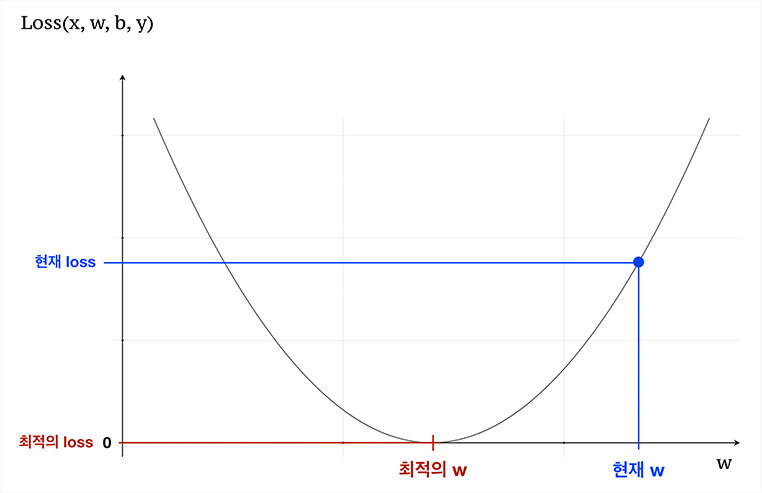

위 그래프의 x축은 $w$이고, y축은 손실함수의 함수값, `loss`값입니다. 즉, 위 그래프는 "$w$ 값에 따른 손실함수" 그래프를 그려놓은 것이죠.

이미 그림에도 표시가 되어 있듯이, 우리가 정말 원하는 것은 손실함수의 값이 0이 되는 것, 아니면 최소한 0에 가까운 작은 값이 되는 것을 바랍니다.
즉, 최적의 $w$는 빨간색으로 표시가 되어있는, 가장 작은 `loss` 값을 만들어내는 $w$ 값이죠.

하지만 우리는 처음부터 최적의 $w$를 알지 못하기 때문에, 랜덤으로 $w$를 아무렇게나 선택했고, 결과적으로 파란색에 위치한 것처럼 현재의 `loss` 값은 매우 큽니다.
그렇다면 우리는 어떻게 현재의 $w$를 최적의 $w$로 옮길 수 있을까요?

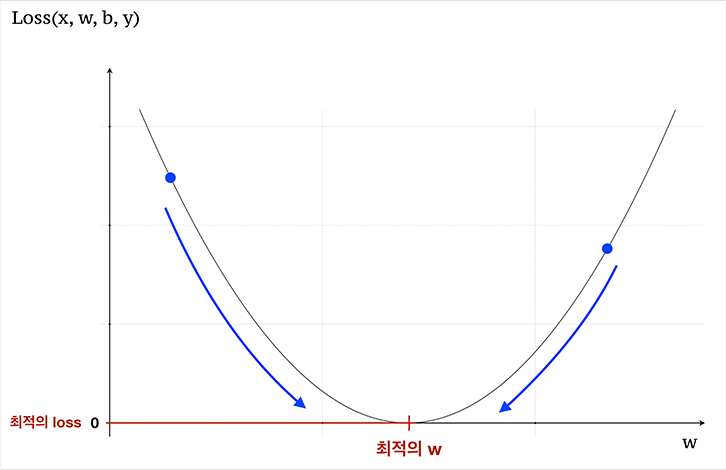

위 그림과 같이 두 가지 상황을 생각해 볼 수 있습니다.

- 만약 현재의 $w$가 최적의 $w$의 **왼쪽** 에 위치하고 있다면 현재의 $w$가 최적의 $w$보다 작다는 의미이므로 우리는 현재의 $w$가 커지도록 늘려야 합니다.
- 반대로 **오른쪽** 에 위치하고 있다면 현재의 $w$ 값이 최적의 $w$ 값보다 크다는 의미이므로 현재의 $w$ 값이 작아지도록 줄여야 합니다.
간단하죠?! 바로 이 아이디어만 있으면 우리는 점차적으로 현재의 $w$ 값을 최적의 $w$에 가까워지게 만들어나갈 수 있습니다!

하지만 여기서 또 한 가지 문제가 있습니다. (😱..ㅎ)

바로 여전히 우리는 **최적의 $w$ 값이 무엇인지를 모르기 때문에, 현재 $w$ 값 또한 최적의 $w$보다 큰지 혹은 작은지를 알 수 없다** 는 점입니다.  
현재 $w$ 값은 3.5인데! 최적의 $w$가 3.5보다 클 것이냐, 작을 것이냐, 이것을 모르는데 어떻게 값을 옮기냐구요!

그래서! 여기에서 아주 편리하고도 (개인적으로는 매우 영리한 방법이라고 생각되는) 도구를 하나 사용합니다.

이미 들어보셨을 수도 있을, 바로 그 유명한 "**기울기**", 혹은 "**그래디언트**" 라고 불리는 친구를 사용하는 것이죠.

위 그림의 왼쪽 점과 오른쪽 점에서 각각 기울기를 그려보도록 하겠습니다.



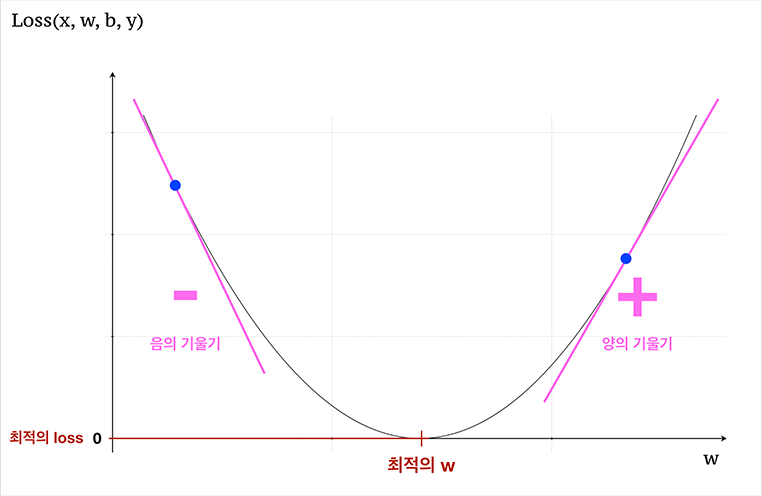

- 왼쪽 점은 자기 자신의 위치보다 **오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에** 그 점에서 그린 접선은 **오른쪽 아래로 향하는 방향** 이고, 그 기울기는 **음수** 입니다.
- 오른쪽 점은 자기 자신의 위치보다 **왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에** 그 점에서 그린 접선은 **왼쪽 아래로 향하는 방향**이고, 그 기울기는 **양수** 입니다.

자, 이렇게 특정 점에서의 기울기는 항상 자기 자신보다 함수값이 작아지는 **방향** 을 알려줄 수 있습니다.  
최적의 $w$가 어디에 있고, 현재 내 위치가 최적의 $w$보다 오른쪽인지, 왼쪽인지 알지 못하더라도 현재 내 위치에서의 기울기만 알 수 있다면 내 위치를 어느 방향으로 옮겨야 하는지를 알 수 있게 되는 것이죠.

따라서 우리는 기울기를 활용해서 다음과 같은 규칙으로 $w$를 업데이트 하면 됩니다!

1. 현재 $w$에서의 기울기를 구한다.
2. 기울기가 음수라면, 현재 $w$를 키운다.
3. 기울기가 양수라면, 현재 $w$를 줄인다.

이러한 규칙을 깔끔하게 수식으로 나타내면 다음과 같습니다.

$$\mathrm{w}^{\prime}=\mathrm{w}-\eta \mathrm{g}$$


- $\mathrm{w}^{\prime}$ : 새로운 $w$
- $\mathrm{w}$ : 현재 $w$
- $\eta$ : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)
- $\mathrm{g}$ : 기울기, 또는 그래디언트

바로 이해가 안 되더라도 괜찮습니다. 어떤 방식으로 $\mathrm{w}^{\prime}$를 효과적으로 업데이트하는지 살펴보죠.

위 식은 기울기의 특성을 아주 영리하게 사용한 식입니다.
위에서 기울기가 음수라면 현재 $w$를 크게 만들고, 기울기가 양수라면 현재 $w$를 작게 만든다고 했습니다.
그렇다면? 복잡하게 생각할 것 없이, 그냥 $w$에서 기울기를 빼 주면 바로 우리가 원하는대로 동작할 수 있는 거죠!

즉, $\mathrm{g}$가 음수라면 $\mathrm{w}-\mathrm{g}$ 식에서 우리는 $\mathrm{w}$에서 음수를 빼주게 되므로 $\mathrm{w}$는 커집니다.
반면, $\mathrm{g}$가 양수라면 $\mathrm{w}-\mathrm{g}$ 식에서 우리는 $\mathrm{w}$ 에서 양수를 빼주게 되므로 $\mathrm{w}$는 작아집니다.

어때요? 우리가 원하는대로 정확히 동작합니다!

여기에서 $\eta$는 고정되어 있는 상수로써 $\mathrm{w}$를 변화시키는 양을 조절하는 역할을 합니다.
즉, $\mathrm{w}^{\prime}=\mathrm{w}-\eta \mathrm{g}$에서 $\mathrm{g}$는 키울지, 줄일지에 대한 "방향과 크기"를, $\eta$는 얼마나 키울지/줄일지에 대한 "배율"을 결정하는거죠.

이렇게 $\eta$와 $\mathrm{g}$, 두 가지 값으로 우리는 $\mathrm{w}$를 계속 업데이트 해나갈 수 있습니다!
조금씩 키우거나, 줄여나가면서 우리는 점점 최적의 $\mathrm{w}$에 가까워질 수 있겠네요 👍

이렇게 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을 **Gradient Descent Method**, 즉 **경사하강법** 이라고 합니다.
이 방법 또한 매우 보편적으로 쓰이는 방법 중 하나이니 꼭 기억해두시길 바라요!

## 미분으로 경사 구하기
---
그렇다면 이제 다시 원래 문제로 돌아와서.. 기울기를 구하는 함수를 구현해 보겠습니다.
지금은 보다 생생한 구현을 위해 직접 기울기를 계산하지만, 앞으로는 텐서플로우 등을 활용해서 아주 빠르고 간편한 코드로 기울기를 구하게 될 것입니다.

우리가 고등학생 때 배웠던, 기울기 혹은 미분계수의 정의가 기억나시나요?

- [참고: 위키백과: 미분](https://ko.wikipedia.org/wiki/%EB%AF%B8%EB%B6%84)

미분계수의 정의를 손으로 한번 써봅시다.

$$\mathrm{f}^{\prime}(\mathrm{a})=\lim _{\mathrm{x} \rightarrow \mathrm{a}} \frac{\mathrm{f}(\mathrm{x})-\mathrm{f}(\mathrm{a})}{\mathrm{x}-\mathrm{a}}=\lim _{\Delta \mathrm{x} \rightarrow 0} \frac{\mathrm{f}(\mathrm{a}+\Delta \mathrm{x})-\mathrm{f}(\mathrm{a})}{\Delta \mathrm{x}}$$

네, 고등학교 때 배웠던 미분의 정의 개념을 살살 떠올려보면 어렵지 않을 겁니다. 우리는 두 번째 수식 정의를 사용해서 기울기를 계산하는 함수를 구현합니다.  
실제로는 극한을 사용해서 $\Delta \mathrm{x}$가 0에 무한히 가까워져야 하지만, 값을 구하는 데에는 충분히 작은 값이라면 충분하기 때문에 우리는 $\Delta \mathrm{x}$를 0.0001로 두고 계산하겠습니다.

이렇게 수학적으로 정확한 값은 아니지만 근사한 미분계수 값을 찾는 방법을 수치미분 이라고 합니다.

위에서 설명을 할 때에는 `w`에 관해서만 했지만, 실제로 우리가 업데이트 해주어야 하는 변수는 `w`와 `b`, 두 가지가 있습니다.

두 가지의 기울기를 모두 계산하는 `gradient` 함수는 다음과 같습니다.

다음 함수는 `x`, `w`, `b`, `y`를 입력받아서 손실함수값을 계산한 후, `w`와 `b` 각각에 대한 기울기를 계산합니다.
손실함수값을 계산하는 과정에 `x`, `w`, `b`를 모델에 넣어서 `prediction`을 출력하고 그 값과 `y`를 비교하는 과정까지 모두 들어있습니다.

In [ ]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

자, 여기까지 되셨다면 이제 정말 최적의 `w`와 `b`를 찾아 최적의 모델을 향해 학습해나가기 위한 모든 준비가 끝났습니다!

다음 단계에서 드디어 우리의 최적의 모델, 최적의 일차함수를 찾아가보도록 하겠습니다.

# 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!
> 정의된 손실함수와 기울기 함수로 모델을 학습시켜 최적화하기

자, 이제 손실함수와 기울기가 모두 준비되었으니 우리는 단계별로 최적의 `w`와 `b`에 접근하며 최적의 모델, $wx+b$를 찾아내기만 하면 되겠군요.

바로 코드로 구현해 보겠습니다. 구현은 지금까지 배웠던 이론보다도 어렵지 않습니다!

## 하이퍼 파라미터
---
먼저 경사하강법에서 필요했던 학습률, $\eta$ 상수를 정의하고 시작하겠습니다.

In [ ]:
LEARNING_RATE = 1
print("슝=3")

사실 학습률은 1이 아니어도 됩니다. 어떤 학습률을 사용하는 것이 가장 좋은지는 실제로 실험을 해 보기 전까지는 모릅니다.
이렇게 학습률과 같이 **모델이 스스로 학습해나가는 파라미터** 가 아니라, `사람이 직접 사전에 정하고 시작해야 하는 파라미터 를 하이퍼 파라미터` 라고 합니다.

앞으로는 학습률뿐만 아니라 다양한 하이퍼 파라미터를 많이 다루게 될 텐데, 실제 모델의 성능을 끌어올리기 위해서는 최적의 하이퍼 파라미터를 찾는 것 또한 매우 중요합니다.
최적의 하이퍼 파라미터는 사람이 직접 찾아야 하기 때문에 많은 실험을 통해 찾을 수밖에 없습니다.
다만 최근에는 이러한 최적의 하이퍼 파라미터를 찾기 위한 실험을 편하고 빠르게 만들 수 있도록 하는 여러 가지 도구가 많이 개발되고 있습니다.

아무튼, 우리는 간단한 실험을 할 예정이니 학습률을 적당히 `1`로 설정하고 시작해 보겠습니다.
사실 복잡한 데이터셋에서는 보통 학습률을 `0.0001` ~ `0.01` 정도의 작은 값으로 사용합니다.

이제는 다음 순서대로 코드를 구현하기만 하면 됩니다!

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 $\mathrm{w}^{\prime}=\mathrm{w}-\eta \mathrm{g}$, $\mathrm{b}^{\prime}=\mathrm{b}-\eta \mathrm{g}$ 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

## 모델 최적화
---
그러면 이 순서대로 시작하겠습니다! 일부 과정은 이미 해봤지만, 복습하기 위해 다시 한 번 실행해 보겠습니다.

먼저 가장 중요한, 우리의 데이터 `x`와 `y`를 준비합니다.

In [ ]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

초기 가중치들을 랜덤한 값으로 설정하고 시작합니다.

In [ ]:
w = 3.1
b = 2.3
w, b

손실함수값이 단계별로 얼마 정도인지를 저장할 `losses`라는 빈 리스트를 준비해 보겠습니다.
학습에 영향을 주는 부분은 아니지만, 실험이 매우 중요한 머신러닝 분야에서 학습이 어떤 식으로 진행되는지를 확인하는 습관을 갖는 것은 중요합니다.

In [ ]:
losses = []
print("슝=3")

그러면 이제 대망의 학습 단계입니다! 위에서 3~5번의 과정을 반복한다고 했습니다.
몇 번 정도 반복하는 것이 좋을까요?

이 질문에 대해서도 정답은 없습니다. 가능하다면 최대한 실험을 많이 해 보는 것 뿐이죠.
물론 무작정 학습을 **무한히 많이** 하는 것도 능사는 아닙니다. 과적합(overfitting)의 문제가 있기 때문이죠.

과적합에 대한 내용은 오늘 내용을 벗어나므로 일단은 넘어가보도록 하겠습니다.

자, 그러면 다음 과정을 파이썬의 for 구문으로 반복해서 학습을 진행해 보도록 하겠습니다!

In [ ]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

오호, 학습을 반복해나가면서 loss 값이 효과적으로 떨어지고 있는 것이 보이는군요!

모든 loss 값을 `losses` 리스트에 저장해 두었으니 그래프로 한번 확인해 봅시다.

In [ ]:
plt.plot(losses)
plt.show()

초기 180 이상으로 매우 컸던 loss 값이 40 이하로 잘 떨어진 것을 확인할 수 있습니다.

특히, 1,000단계 이후로는 거의 떨어지지 않는군요. 거의 최적에 도달했기 때문에 아무리 업데이트를 해도 더 이상 떨어지지 않는 단계에 다다른 것으로 보입니다.

그렇다면 지금의 `w`와 `b` 값을 한번 확인해 볼까요?

In [ ]:
w, b

적당한 값들로 수렴한 것 같군요.

그러면 이제 원래 우리의 데이터와 학습이 완료된 모델, 일차함수를 함께 그려보겠습니다.

In [ ]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

와우! 어떤가요? 우리가 원하던 그림이 나왔습니다!

데이터들이 산발적으로 찍혀있기 때문에 모든 데이터를 지나는 직선을 그리는 것은 불가능하지만, 그릴 수 있는 직선 중 가장 데이터를 관통하는 직선을 찾았다고 볼 수 있을 것 같군요.

그러면 이제 학습했던 데이터외에, 학습 과정에서 보지 않았던 새로운 데이터를 입력해도 효과적으로 예측을 해낼 수 있는지 테스트를 해 보겠습니다.

아래 코드로 새로운 데이터인 `macbook_test` 데이터를 가져와 보겠습니다.

In [ ]:
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

위 데이터는 학습했던 데이터와 같은 경향성을 가지지만, 모델이 학습하는 과정에서는 접해 보지 않은(unseen) 데이터입니다.
크기는 20개로 크지 않은 간단한 데이터이군요.

예상 가능하지만, 위 데이터에 대해서도 모델은 잘 맞출 수 있겠죠?

test 데이터를 새로 `test_x`와 `test_y`에 담아보겠습니다.

In [ ]:
test_x = test['used_years'].values
test_y = test['price'].values

이제 모델에게 새로운 `test_x` 데이터를 넣어서 `test_prediction`을 구해 보죠!

In [ ]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

오호, 언뜻 봤을 때 실제 가격과 비슷한 예측을 해내는 것 같습니다.

`error`를 직접 계산해서 새로운 컬럼으로 넣어보죠.

In [ ]:
test['error'] = test['price'] - test['prediction']
test

이쯤 했다면 위에서 우리가 손실함수로 사용했던 rmse 값도 직접 구해 볼 수 있겠네요!

In [ ]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

In [ ]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

데이터가 작지만, 학습해 보지 않은 새로운 데이터에 대해서도 예측해낼 수 있는 모델로 보입니다! 오차가 좀 있지만 일차함수치곤 꽤 잘하는 것 같지요?

여기까지 가장 간단한 데이터인 "사용 연수"와 "맥북의 중고가" 데이터를 가지고 사용연수를 입력받았을 때 중고가를 예측해 볼 수 있는 모델을 학습시켜보았습니다.

그 과정에서 **손실함수**와 **기울기**, 그리고 **경사하강법** 등의 매우 중요한 개념들도 함께 배워보았죠.

여기까지 잘 따라와 주신 여러분 수고하셨습니다.! 잠시 숨을 돌리며 쭈욱 스트레칭을 해 볼까요? 우리의 여정은 아직 끝나지 않았습니다.!!

# 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
자, 우리는 이전 단계에서 단 하나의 정보인 "사용 연수"만을 가지고 맥북의 중고가를 예측해 보는 일차함수 모델을 설계하고 학습도 시켜보았습니다.

이번에는 조금 더 복잡한 데이터를 활용해 볼 차례입니다.
우리가 노트북에 관해 가지고 있는 데이터가 사용 연수뿐만 아니라 맥북 에어인지 프로인지, 화면의 크기, 무게, SSD의 용량, RAM의 크기 등 보다 다양한 정보가 있다면요!?

당연히 모델을 잘 학습만 시킬 수 있다면 중고가를 보다 정확하게 예측할 수 있을 것입니다. 중고가라는 게 사실 몇 년 사용했는지만으로 결정되는 것은 절대 아니니까요!

그러면 바로 다양한 정보가 있을 때 모델을 설계하고 학습하는 과정도 바로 진행해 보도록 하겠습니다. 우리는 다변수 선형회귀를 사용할 겁니다.
이름이 어려워도 걱정하지 마세요! 대부분은 비슷하게 진행될 겁니다. 이미 우리는 어려운 이론들은 모두 배웠으니, 그 과정을 응용하기만 하면 됩니다!

## 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
---
> 다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기

자, 이번에 사용할 데이터에는 단 하나의 정보만이 담겨있지 않습니다. 여러 가지 변수로 하나의 값이 결정되죠.

우리는 이번에 손님 테이블에 대한 여러 가지 정보가 담긴 데이터셋으로 그 테이블이 낼 팁(tip)을 예측해 볼 것입니다.
어떤 정보가 있고, 그 정보를 활용해서 효과적으로 팁을 예측할 수 있을지 실험해 보죠.

팁 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함되어 있습니다.  
seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지로, 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.

- [matplotlib 예제](https://matplotlib.org/cheatsheets/)
- [seaborn 공식 홈페이지](http://seaborn.pydata.org/)

seaborn은 간단한 데이터셋으로 여러 실험을 해 볼 수 있도록 샘플 데이터셋을 제공합니다.  
제공되는 데이터셋은 다음 함수로 확인할 수 있습니다.

In [ ]:
import seaborn as sns

sns.get_dataset_names()

비행 데이터를 담은 `flights`, 붓꽃 데이터를 담은 `iris` 등 여러 가지 데이터가 있네요.
이 중 우리가 오늘 사용해 볼 팁 데이터는 `sns.load_dataset("tips")` 으로 가져올 수 있습니다.

In [ ]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

총 244개의 행과 7개의 열로 이루어져 있군요.
각 데이터는 `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, `size` 7개의 정보를 담고 있습니다.

각 컬럼은 다음과 같은 정보를 나타내죠.

- `total_bill` : 테이블의 전체 지불 금액
- `tip` : 팁으로 낸 금액
- `sex` : 계산한 손님의 성별
- `smoker` : 손님 중 흡연자 포함 여부
- `day` : 요일
- `time` : 시간
- `size` : 테이블 인원수

그런데 한 가지 문제가 있습니다.

바로 문자열 형태의 데이터가 몇몇 있다는 것이죠.  
우리는 위에서 살펴봤듯 수식에 데이터를 넣어서 계산할 것이기 때문에, 모든 데이터의 값이 실수여야 합니다.

따라서 다음과 같이 판다스의 `get_dummies()` 함수를 활용해 문자열 데이터에 대해서는 0, 1 로 변환해주겠습니다. 수식을 구할 때 카테고리형 데이터가 있다면 더미 변수(dummy variable)를 활용해 식에 포함시켜 줄 수 있습니다.

- [더미 변수 (Dummy Variable)](https://modulabs.co.kr/blog/dummy-variable/)

In [ ]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

좋습니다! 문자열 데이터는 모두 사라지고, 대신 `sex_Male`, `sex_Female`과 같이 각 카테고리에 대한 컬럼이 새롭게 만들어졌습니다.

이렇게 내가 가지고 있는 데이터 중 실수형 데이터가 아닌 카테고리 데이터일 때에는 pandas의 get_dummies 함수로 간편하게 숫자 데이터로 변환해줄 수 있습니다.  
이러한 데이터 변환 방식을 **원-핫 인코딩(One Hot Encoding)** 이라고 하죠. 이미 알고 계실 것이라 생각합니다!

그렇다면 꼭 해야 하는 것은 아니지만, 컬럼의 순서를 우리의 목적에 맞게 바꾸어보겠습니다.

우리는 나머지 모든 데이터를 가지고 최종적으로 `tip` 값을 예측하려고 합니다. 따라서 `tip` 컬럼을 맨 오른쪽에 두도록 하겠습니다.

In [ ]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

좋습니다.
위 데이터를 보시면 각 행에는 `total_bill`부터 `time_Dinner`까지, 총 12가지의 정보가 있습니다.
그리고 12가지의 정보로부터 결정된 팁의 가격, `tip`값이 있죠.

그러면 우리는 모델을 어떻게 만들어볼 수 있을까요?

이전에 입력 데이터가 "사용연수"로 단 한 개였을 때 우리는 모델을 다음과 같이 설정하였습니다.

$$\mathrm{y}=\mathrm{wx}+\mathrm{b}$$

그렇다면 이번에는 `x`가 한 개가 아닌, 12개나 됩니다! 그렇기에 우리는 모델을 다음과 같이 설정해 볼 수 있죠.

$$\mathrm{y}=\mathrm{w}_1 \mathrm{x}_1+\mathrm{w}_2 \mathrm{x}_2+\mathrm{w}_3 \mathrm{x}_3+\mathrm{w}_4 \mathrm{x}_4+\mathrm{w}_5 \mathrm{x}_5+\mathrm{w}_6 \mathrm{x}_6+\mathrm{w}_7 \mathrm{x}_7+\mathrm{w}_8 \mathrm{x}_8+\mathrm{w}_9 \mathrm{x}_9+\mathrm{w}_{10} \mathrm{x}_{10}+\mathrm{w}_{11} \mathrm{x}_{11}+\mathrm{w}_{12} \mathrm{x}_{12}+\mathrm{b}$$

와우! 복잡해 보인다구요?
아니요, 식의 본질만 이해한다면 아주 간단합니다.

우리가 입력데이터 `x`가 단 하나였을 때 사용했던 가중치는 `x`와 곱했던 `w`, 그리고 상수 `b`로 두 개였죠.  
이번에는 `x` 정보가 12개입니다. 따라서 같은 원리로 각 x값을 조정할 수 있도록 각각의 `x`에 각기 다른 `w`를 곱하고, 상수 `b` 는 단 하나를 더해주죠.

## 선형 회귀
---
이러한 식을 우리는 **선형 방정식**이라고 합니다. 다른 말로는 "다변수 일차방정식"이라고 할 수도 있죠.  
중요한 것은, 우리는 각각의 `x`에 개별 가중치를 곱해주는 것 말고는 다른 조작을 하지 않는다는 것입니다.

이렇게 선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법을 **선형 회귀** 라고 합니다.  
선형 회귀는 **선형 방정식** 을 통해 **회귀 문제를 푼다** 는 의미가 담겨 있습니다.

이 중 특히 **회귀** 라는 단어는 **연속된 실수값을 예측하는 문제** 를 뜻합니다.  
회귀와 대립되는 개념은 **분류** 인데, 다음 예를 보면 가볍게 이해가 되실 겁니다.

- 사진을 입력받아 해당 사진이 강아지인지, 고양이인지 맞히는 문제는 **분류** 문제입니다.
- 사용연수, 화면크기 등을 입력받아 실수값인 중고 가격을 맞히는 문제는 **회귀** 문제입니다.

즉, 분류 문제는 맞히고자 하는 값이 **카테고리** 이고, 회귀 문제는 맞히고자 하는 값이 **연속된 실수 값** 입니다.



**Q. 집의 평수, 층, 위도와 경도 등을 입력받아 집의 가격을 맞추는 문제는 분류인가요, 회귀인가요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

맞추고자 하는 값이 집의 가격으로 연속된 실수값이므로 회귀 문제이다.

**Q. 손으로 쓴 숫자 이미지를 입력받아 해당 이미지가 어떤 숫자를 나타내는지 맞추는 문제는 분류인가요, 회귀인가요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

맞추고자 하는 값이 0~9 사이의 특정 숫자 카테고리이므로 분류 문제이다.

## 시각화
---
다만, 여기에서 안타까운 점이 하나 있습니다.
우리는 위에서 `x`축과 `y`축을 활용해서 2차원 평면에 데이터를 찍어서 시각화할 수 있었습니다.

만약 입력 데이터인 `x`가 $\mathrm{x}_{1}$, $\mathrm{x}_{2}$ 로 두 개이고, 그 두 값으로 $\mathrm{y}$값이 정해진다면 다음과 같은 3차원 공간에 시각화를 해 볼 수 있겠죠.

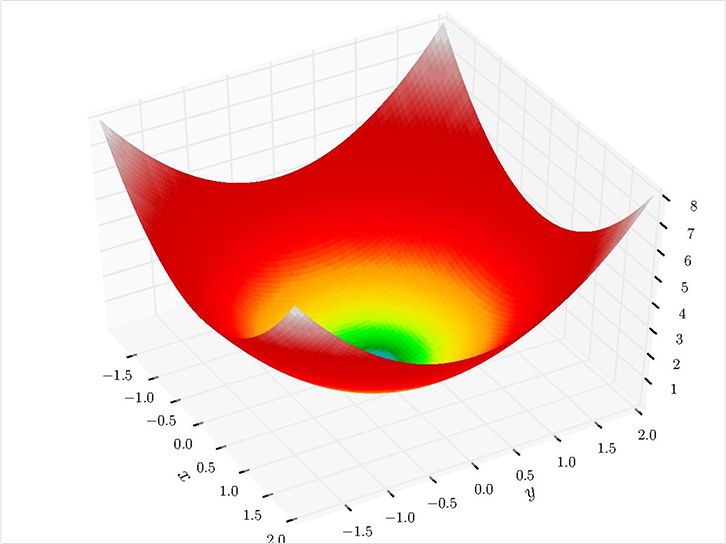

하지만, 입력 데이터 `x`가 3개 이상으로 늘어난다면 우리는 더이상 시각화를 할 수가 없게 됩니다.
우리 존재가 3차원 공간에 살고 있기 때문에, 4차원 이상은 상상할 수도, 그려볼 수도 없기 때문이죠!

그렇기 때문에 2개 이상의 입력 변수가 있는 경우에는 데이터가 존재할 n차원의 공간을 어렴풋이 상상하며 최적의 함수를 찾을 뿐, 눈으로 확인할 수는 없습니다.

그래도 단변수 데이터에 대해 시각화를 하며 모델이 어떻게 학습해나가는지를 확인하였으니, 변수의 개수 빼고는 그것과 완전히 동일한 방식을 사용한다는 것을 잊지 마세요!

그러면 이제 다시, 우리의 모델을 다음과 같이 정의하겠습니다.

$$\mathrm{y}=\mathrm{w}_1 \mathrm{x}_1+\mathrm{w}_2 \mathrm{x}_2+\mathrm{w}_3 \mathrm{x}_3+\mathrm{w}_4 \mathrm{x}_4+\mathrm{w}_5 \mathrm{x}_5+\mathrm{w}_6 \mathrm{x}_6+\mathrm{w}_7 \mathrm{x}_7+\mathrm{w}_8 \mathrm{x}_8+\mathrm{w}_9 \mathrm{x}_9+\mathrm{w}_{10} \mathrm{x}_{10}+\mathrm{w}_{11} \mathrm{x}_{11}+\mathrm{w}_{12} \mathrm{x}_{12}+\mathrm{b}$$

## 표기법
---
한 가지, 아주 중요한 부분은 아니지만 보편적인 표기법을 한 가지 더 소개하겠습니다.

일반적으로 `x`와 곱해지는 매개변수는 `w`로, 그리고 상수는 `b`로 표기합니다. 이 때 지금과 같이 `x`의 개수가 여러 개라면 `w`는 $\mathrm{w}_{n}$ 과 같이 아래첨자로 숫자를 표기하죠.

이것과 통일하기 위해 상수 `b`는 $\mathrm{b}$ 대신 $\mathrm{w}_{0}$ 으로 표기하기도 합니다. 이렇게요!

$$\mathrm{y}= \mathrm{w}_0 + \mathrm{w}_1 \mathrm{x}_1+\mathrm{w}_2 \mathrm{x}_2+\mathrm{w}_3 \mathrm{x}_3+\mathrm{w}_4 \mathrm{x}_4+\mathrm{w}_5 \mathrm{x}_5+\mathrm{w}_6 \mathrm{x}_6+\mathrm{w}_7 \mathrm{x}_7+\mathrm{w}_8 \mathrm{x}_8+\mathrm{w}_9 \mathrm{x}_9+\mathrm{w}_{10} \mathrm{x}_{10}+\mathrm{w}_{11} \mathrm{x}_{11}+\mathrm{w}_{12} \mathrm{x}_{12}$$

그렇다면 우리는 다음과 같은 표현을 할 수도 있습니다.

$$\mathrm{y}= \mathrm{w}_0 \times 1 + \mathrm{w}_1 \mathrm{x}_1+\mathrm{w}_2 \mathrm{x}_2+\mathrm{w}_3 \mathrm{x}_3+\mathrm{w}_4 \mathrm{x}_4+\mathrm{w}_5 \mathrm{x}_5+\mathrm{w}_6 \mathrm{x}_6+\mathrm{w}_7 \mathrm{x}_7+\mathrm{w}_8 \mathrm{x}_8+\mathrm{w}_9 \mathrm{x}_9+\mathrm{w}_{10} \mathrm{x}_{10}+\mathrm{w}_{11} \mathrm{x}_{11}+\mathrm{w}_{12} \mathrm{x}_{12}$$

즉, 상수 `b`를 없애는 대신 $\mathrm{x}_{0} = 1$ 이라는 상수 $\mathrm{x}_{0}$ 으로 식을 표현하기도 합니다.

매우 중요한 것은 아니지만, 때에 따라 표기하는 방식이 달라질 수 있으니 다양한 표기법을 아는 것은 보다 넓게 이해하는 데 도움이 됩니다.

# 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (2) 다시 한 번 직접 설계해 보는 손실함수
> 다변수 데이터에 대해 선형회귀를 하기 위한 손실함수를 정의하기

그러면 이제 본격적으로 데이터를 준비하고 모델을 설계해서 학습을 시켜 보겠습니다!

먼저 데이터는 다음과 같이 준비하면 됩니다. 다만, 앞으로는 `X`는 하나의 값이 아닌 12개의 값을 가지는 **벡터** 이므로, 대문자로 표기하도록 하겠습니다.

In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

자아, 준비가 되어가고 있습니다.

한 가지 잊지 말아야 할 단계는, 데이터를 `train` 데이터와 `test` 데이터로 분리하는 것입니다.  
모델이 일정량의 데이터로 학습한 뒤 그 모델을 공정하게 평가하기 위해서는 학습 과정에서 보지 못했던 데이터를 이용해야 한다는 점, 알고 계시죠?

`sklearn` 라이브러리에 내장되어 있는 `train_test_split을` 활용해 데이터를 분리해 보도록 하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

입력 데이터와 정답 데이터는 준비가 완료되었네요!

다음으로, `W`와 `b`는 랜덤한 값으로 초기값을 설정해주도록 하겠습니다. `W` 또한 벡터이므로 대문자를 사용합니다.

**Q. W 벡터에는 몇 개의 숫자가 들어가야 할까요? 또, b는 몇 개의 숫자로 이루어져 있을까요?**
<details>
<summary>💡예시답안 확인하기💡</summary>

우리는 현재 12개의 정보(feature)가 있는 데이터로 tip 값을 예측하려고 합니다. 따라서 우리의 모델에는 12개의 w와 1개 숫자인 상수 b가 필요합니다.

길이가 12인 `W`와 1개의 숫자인 `b`를 준비합니다.

In [ ]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

In [ ]:
W

In [ ]:
b

네, w에는 12개의 랜덤한 값으로 $\mathrm{w}_{1}$ 부터 $$\mathrm{w}_{12}$ 가 담겼고, $\mathrm{b}$는 하나의 상수값이 담겼습니다.

다음은 모델을 준비하겠습니다. 모델은 이전 단계와 같이 `x`, `w`, `b`를 입력받는 함수입니다.
정확히는 다음 식을 연산하는 함수면 되죠.

$$\mathrm{y}=\mathrm{w}_1 \mathrm{x}_1+\mathrm{w}_2 \mathrm{x}_2+\mathrm{w}_3 \mathrm{x}_3+\mathrm{w}_4 \mathrm{x}_4+\mathrm{w}_5 \mathrm{x}_5+\mathrm{w}_6 \mathrm{x}_6+\mathrm{w}_7 \mathrm{x}_7+\mathrm{w}_8 \mathrm{x}_8+\mathrm{w}_9 \mathrm{x}_9+\mathrm{w}_{10} \mathrm{x}_{10}+\mathrm{w}_{11} \mathrm{x}_{11}+\mathrm{w}_{12} \mathrm{x}_{12}+\mathrm{b}$$

따라서 `for` 구문을 활용해 1부터 12까지 `x * w`를 수행하고, 마지막에 `b`를 더해주도록 하겠습니다.

In [ ]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

간단하네요!

손실함수는 이번에는 RMSE 대신 MSE를 사용해 보겠습니다. 이전에 사용했던 RMSE는 단지 MSE의 제곱근이었으므로, 이번에는 제곱근하는 과정만 빼면 됩니다.

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

# 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기
> MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기

다음은 기울기입니다.  
기울기를 구하는 것은 이전보다는 조금 복잡합니다. 하지만 천천히 보면 어렵지 않습니다.

먼저 이전에 우리는 기울기를 미분계수의 정의 식으로 구했습니다. 이번에는 조금 다른 트릭을 사용할 건데, 바로 수학적인 미분 공식을 활용할 것입니다!

자, 우리가 미분해야 하는 손실함수 식을 다시 한 번 떠올려봅시다.

$$Loss = MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{i, true}-y_{i, pred})^2$$

네, MSE 값은 정답 `y`와 예측한 `y` 간의 차이를 제곱해서 평균한 값이었습니다.
모델이 잘 예측할수록 MSE 값은 작아지고, 예측을 잘 못할수록 커지는 값이죠.

우리는 이전에 기울기를 구하기 위해 단순한 수치미분을 사용했지만, 그 식은 아주 간단한 이차방정식이었습니다. 따라서 직접 미분 공식을 사용해서 계산할 수도 있었죠!
자자, 2차 방정식의 미분 공식을 알고 있기 때문에 당장 미분을 하고 싶어서 근질근질 거리는 분이 있으신 것 같지만, 아직 한 가지 고민해 봐야 할 점이 있습니다.

$y_{pred}$식이 어떻게 생겼었는지 한 번만 생각해 보죠.

$
\begin{align}
    y_{pred} & =  w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + \dots + w_{11} x_{11} + w_{12} x_{12} + b \\
    & = b + \sum_{j=1}^{M} w_{j}x_{j}
\end{align}
$

그러면 우리는 손실함수를 어떤 값에 대해 미분을 해야 했나요?
고등학생 때 단순히 무조건 $x$ 로 미분하던 것과는 다른 상황입니다!

천천히 우리가 손실함수를 미분하는 이유를 다시 떠올려보면서 다음 질문에 답을 해 봅시다.

우리는 손실함수를 어떤 변수로 미분해야하나요? 다시 한 번 생각해 봅시다.

- 우리가 손실함수를 미분하는 이유는 최적의 매개변수, $\mathrm{w}$와 $b$에 가까워지는 방향을 알기 위함이었다.
- 특정 순간에 기울기가 양수라면 $\mathrm{w}$를 더 작게 줄이고, 기울기가 음수라면 $\mathrm{w}$를 더 크게 늘린다.
즉, 우리는 $\mathrm{w}^{\prime}=\mathrm{w}-\eta \mathrm{g}$ 공식을 활용해서 변수를 업데이트하는데, 이 때 기울기는 변수 업데이트의 방향을 결정하는 역할을 한다.
- 따라서 손실함수는 언제나 내가 최적을 찾고자 하는 매개변수, 혹은 가중치에 대해 미분해야 한다.
- 현재 모델에는 $\mathrm{w}_1$ 부터 $\mathrm{w}_{12}$ 까지 12개의 $\mathrm{w}$ 와, 1개의 $\mathrm{b}$가 있으므로 우리는 총 13개의 변수에 대해 미분을 해야 한다.

좋습니다. 우리는 총 13가지의 매개변수에 대해 손실함수를 13번 미분해야 하는군요.
여기서 간단하게 편미분의 개념이 들어가지만, 사실 어려울 것은 없습니다. 손실함수를 13개의 변수에 대해 각각 미분하겠다는 의미와 같으니까요!

그러면 13개의 미분식을 전부 쓰기는 조금 귀찮은 면이 있으니, 한 변수에 대한 미분식만 써보도록 하겠습니다.

손실함수를 $\mathrm{w}_{j}$ 에 대해 미분을 하면 다음과 같아지겠군요.

여기서 j는 가중치(데이터의 Feature)의 개수입니다.

\begin{align}
    \frac {\partial L} {\partial w_j} & = \frac {\partial} {\partial w_j} \{\frac {1}{N} \sum_{i=1}^{N} (y_{i, true}-y_{i, pred})^2 \} \\
    & = \frac {1}{N} \sum_{i=1}^{N} \frac {\partial} {\partial w_j} \{(y_{i, true}-y_{i, pred})^2 \}
\end{align}

우리는 $\mathrm{w}_{j}$ 에 대해 미분하고 있으니, $\mathrm{w}_{j}$ 와 관계없는 $\frac{1}{N}$ 은 간단히 무시하고, 미분에는 영향을 주지 않는 덧셈 연산인 $\sum$ 안으로도 넣을 수 있습니다.

이제는 $(y_{i, true}-y_{i, pred})^2$ 을 $\mathrm{w}_{j}$로 미분하면 됩니다.

그런데 여기에서도 $y_{i, pred}$ 만 $\mathrm{w}_{j}$ 을 포함하는 함수일 뿐, $y_{i, true}$ 값은 $\mathrm{w}_{j}$ 와 관계없는 상수이기 때문에, 간단한 미분으로 볼 수 있습니다.
점점 복잡해지는 것 같기 때문에.. 우리가 이해할 수 있는 간단한 모양의 식으로 바꿔서 보겠습니다. 😂

$$\frac {\Delta (x - a)^2} {\Delta x}$$

위와 같은 식은 어떻게 미분을 할 수 있나요?

$a$는 $x$에 관계없는 상수이므로 다음과 같이 간단히 미분이 됩니다.

$$\frac {\Delta (x - a)^2} {\Delta x}= 2(x-a)$$

정확히는 다음과 같이 합성함수의 미분을 사용한 과정이죠! 보다 엄밀한 과정을 궁금해하실 분을 위해 다음 식도 적어두겠습니다.

\begin{align}
\frac {\Delta (x - a)^2} {\Delta x} &= 2(x-a) × \frac {\Delta (x-a)} {\Delta x} \\
&= 2(x-a) × 1 \\
&= 2(x-a)
\end{align}

그러면 최종적으로 우리가 손실함수에 대해 미분하는 식은 다음과 같아지겠습니다!

\begin{align}
\frac {\partial L} {\partial \textbf{w}} &= \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} \frac {\partial} {\partial w_j} \{(y_{i, true}-y_{i, pred})^2 \} \\
&= \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} 2(y_{i, true}-y_{i, pred}) × \frac {\partial (y_{i, true}-y_{i, pred})} {\partial w_j} \\
&= \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} 2(y_{i, true}-y_{i, pred}) × (-x_{i,j}) \\
&= \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} 2x_{i,j}(y_{i, pred}-y_{i, true})
\end{align}

여기서 $(y_{i, true}-y_{i, pred})^2$를 $w_j$ 로 미분하는 중간 과정 $\frac {\partial (y_{i, true}-y_{i, pred})} {\partial w_j}$은 다음과 같습니다.  
$y_true$와 나머지 변수들은 전부 $w_j$로 편미분 할 때에는 상수와 다름없으므로 사라지게 되죠.

\begin{align}
\sum_{j=1}^{M} \frac {\partial (y_{i, true}-y_{i, pred})} {\partial w_j} &= \sum_{j=1}^{M} \frac {\partial \{y_{i, true}-(w_1x_1 + \cdots + w_Mx_M + b)\}} {\partial w_j} \\
&=  \sum_{j=1}^{M}   \frac {\partial \{y_{i, true}-w_{j}x_{j}\}} {\partial w_j}     \\
&= -\sum_{j=1}^{M}x_j
\end{align}

아!! 여기까지 너무나 지루한 수학시간이었네요. 🤯
하지만 이 과정은 한 번 잘 이해해두면 머신러닝에서 가장 핵심이라고 할 수 있는 경사하강법과 미분에 대해 누구보다 거의 완벽하게 이해했다고 할 수 있기 때문에 손으로 꼭 써보면서 이해하고 넘어가는 것을 권장드립니다.

결론적으로 우리의 손실함수에 대한 미분은 다음과 같습니다.

$$\frac {\partial L} {\partial w} = \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} 2x_{i,j}(y_{i, pred}-y_{i, true})$$

특별히, $b$ 에 대한 미분은 다음과 같겠죠. 위에서 $w_j$ 으로 미분했던 것을 생각하면, 다음 식이 자연스럽게 와닿으실 겁니다.

$$\frac {\partial L} {\partial b} = \frac {1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} 2(y_{i, pred}-y_{i, true})$$

**Q. b에 대한 미분 결과는 w에 대한 미분 결과와 어떤 점이 다른가요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

미분 결과에 x가 들어가지 않는다. 이는 y_pred를 b로 미분하면 1이 되기 때문이다.

좋습니다! 이제 모든 과정이 이해됐군요. 이것을 그대로 구현하면 다음과 같습니다.

In [ ]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

한번 실험삼아 경사(gradient)를 계산해 볼까요?

In [ ]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

오호, $w_1$ 부터 $w_12$ 까지 12개의 기울기(gradient)값과, $b$ 의 기울기(gradient)를 효과적으로 구하는 것으로 보입니다.  
기울기까지 준비되었으니 이제 다음 단계로 가보시죠!

# 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (4) 모두 준비 되었다면, 모델 학습은 간단하다구!
> 직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기

이제 모든 준비가 끝났으니 뭐만 하면 될까요?!
반복해서 가중치를 업데이트 하며 학습을 진행해 보시죠!

이번에는 학습률을 `0.0001`로 두겠습니다.

In [ ]:
LEARNING_RATE = 0.0001

학습 과정은 위에서와 완전히 똑같습니다. `gradient`를 구하고, `W`와 `b`를 업데이트하고, 손실함수를 기록합니다.

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

아주 효과적으로 잘 내려가는군요. `W`와 `b`의 값을 확인해 볼까요?

In [ ]:
W, b

그렇다면 `X_test` 데이터와 `y_test` 데이터에 대해서도 역시 예측을 해 보겠습니다.

학습때 보지 않은 test 데이터에 대해서는 loss값이 얼마나 될까요?

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

꽤나 작게 잘 맞히는 것 같습니다.

마지막으로 우리의 모델이 예측한 `prediction`과 실제 정답인 `y_test`를 비교해서 얼마나 잘 맞혔는지 그래프로 확인해 보도록 하겠습니다.
`X_test`의 각 행의 첫 번째 데이터가 `total_bill`이므로, 다음과 같이 시각화를 하면 됩니다.

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

네, `x`축에는 `total_bill`을, `y`축에는 각각 `tip`값과 `prediction` 값을 표시하였습니다.

어떤가요, 꽤나 잘 맞히는 것 같지 않나요?!

# 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게
> 모델 설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기

자, 이제 지금까지 학습한 모든 내용을 사이킷런(`sklearn`) 라이브러리를 활용해서 아주 편리하고 깔끔하게 진행해 보겠습니다.  
사이킷런을 사용하면 모델이 학습하기 위한 손실함수, 기울기 계산을 직접할 필요가 없기 때문에 매우 간단하게 모델 학습이 완료됩니다.

먼저 우리가 사용했던 데이터를 똑같이 준비해 봅시다.

In [ ]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

다음으로 위에서 했던 것과 같이 `X`와 `y`를 준비하겠습니다.

In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

`X`와 `y`를 `train` 데이터와 `test` 데이터로 분리해 봅시다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

자, 데이터가 준비되었으니 우리는 준비된 모델을 가져다 쓰기만 하면 됩니다.

선형회귀 모델은 `sklearn.linear_model` 안에 `LinearRegression` 로 내장되어 있습니다.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

이렇게 하면 모델 준비가 완료됩니다!

놀랍지 않나요? 가중치를 따로 선언할 필요도, 손실함수와 기울기를 계산할 필요도 없죠 하하 😅

모델 학습은 다음과 같이 입력 데이터에 해당하는 `X_train`과 정답 데이터에 해당하는 `y_train`을 넣어 `fit` 시키면 됩니다.

In [ ]:
model.fit(X_train, y_train)

모델 학습이 완료되었네요!

이제 `X_test` 데이터에 대한 예측을 해 볼까요?

In [ ]:
predictions = model.predict(X_test)
predictions

각각의 `X` 데이터에 대해 `tip` 데이터를 잘 예측한 것 같습니다.

그러면 이제 정답 데이터와 비교해 모델의 성능을 평가해 봅시다.
모델의 성능은 `mse`로 계산해 볼텐데, 이는 `sklearn.metrics`의 `mean_squared_error`에 들어있습니다.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7 정도의 성능으로, 이전 스텝에서 우리가 직접 만들었던 모델의 0.68과 유사한 성능을 보이는군요.
우리가 만들었던 모델도 나쁘지 않았던 것 같습니다.😊

위에서 했던 것과 같이 `X`축에는 `total_bill`을, `y` 축에는 `tip`을 두고 시각화를 해 보겠습니다.

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

어떤가요? 조금은 더 잘 맞히는 것 같나요?!

## 정리
---
여기까지 잘 따라와 주신 여러분 정말 수고 많으셨습니다!👏👏 다시 배운 내용을 상기 해 보자면, 우리가 풀어본 문제는 머신러닝 중에서도 "선형 회귀" 문제였습니다.

사실 앞으로는 회귀 문제를 이렇게 풀지 않고 기울기나 모델 학습 과정은 텐서플로우에 내장된 편리한 함수들을 이용하게 될 것입니다.  
하지만, 이미 편하게 쓸 수 있도록 구현되어 있는 라이브러리를 사용할 때에도 내가 무엇을 하려고 이 라이브러리를 사용하고 있는지를 이해하고 쓰는 것과 아닌 것은 매우 큰 차이가 있죠!

- 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction, 각각의 개념을 알고, 정답데이터에 가까운 출력을 낼 수 있도록 학습한다는 철학을 이해해 보았고,
- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류를 알아보았으며 직접 구현해 보았습니다.
- 또한, 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행했죠.
- 그리고, 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익혀보았습니다.
- 마지막으로는 사이킷런을 활용해서 간편하고 빠르게 선형 회귀를 진행해 보기도 했어요!

이 모든 내용을 완벽하게 소화했다고 느낀다면, 분명 앞으로 달리 보이는 것들이 있으실 겁니다!  
잘 이해가 안 되었던 수식 또는 내용이 있었다면 꼭 정리를 해 보고, 복습도 해 보시는 것을 권장드립니다.

그러면 배운 내용을 토대로 프로젝트를 진행하고 마무리하겠습니다 👏🏼